In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import warnings
warnings.filterwarnings("ignore", message="covariance of constraints does not have full rank")
warnings.filterwarnings("ignore", category=RuntimeWarning, message="invalid value encountered in divide")

## Import data

In [25]:
df = pd.read_excel('SoilHealthDB_V2.xlsx')
# df.head()

In [65]:
pd.set_option('display.max_columns', None)
# Corrected management columns (replacing the incorrect one)
management_columns_corrected = [
    'CoverCrop', 'CoverCropGroup', 'TimeAfterCoverCrop', 'CC_termination_date',
    'Rotation_C', 'Rotation_T',
    'Tillage_C', 'Tillage_T',
    'Fertilization_C',
    'Conservation_Type', 'Conservation_Discription'
]

# Identifier and location columns
identifier_columns = ['StudyID', 'ExperimentID', 'Country', 'SiteInfor']

# Soil health indicator column prefixes
soil_health_prefixes = [
    'SoilBD', 'SoilpH', 'OC_', 'N_', 'P_', 'K_', 'CEC_', 'EC_', 'BS_',
    'Porosity_', 'Penetration_', 'Infiltration_', 'Erosion_', 'Runoff_', 'Leaching_',
    'ST_', 'SWC_', 'AWHC_',
    'Weed_', 'Diseases_', 'Pests_', 'SoilFauna_', 'Fungal_', 'OtherMicrobial_',
    'Enzyme_', 'Cmina_', 'Nmina_', 'NxO_', 'SIR_', 'CO2BTest_', 'CO2_', 'CH4_',
    'MBC_', 'MBN_', 'SQI', 'ESS'
]

# Select soil health columns based on prefixes
soil_health_columns = [col for col in df.columns if any(col.startswith(prefix) for prefix in soil_health_prefixes)]

# Combine all columns
final_columns = identifier_columns + management_columns_corrected + soil_health_columns

# Filter and display the DataFrame
full_selection_df = df[final_columns]

full_selection_df.head()

,StudyID,ExperimentID,Country,SiteInfor,CoverCrop,CoverCropGroup,TimeAfterCoverCrop,CC_termination_date,Rotation_C,Rotation_T,Tillage_C,Tillage_T,Fertilization_C,Conservation_Type,Conservation_Discription,CEC_Unit,SoilBD,SoilpH,OC_C,OC_T,OC_C_SD%,OC_T_SD%,OC_Con_C,OC_Con_T,OC_C_SD,OC_T_SD,OC_C_Seq,OC_T_Seq,OC_C_SD_Seq,OC_T_SD_Seq,N_C,N_T,N_C_SD,N_T_SD,P_C,P_T,P_C_SD,P_T_SD,K_C,K_T,K_C_SD,K_T_SD,CEC_C,CEC_T,CEC_C_SD,CEC_T_SD,EC_C,EC_T,EC_C_SD,EC_T_SD,BS_C,BS_T,BS_C_SD,BS_T_SD,Porosity_C,Porosity_T,Porosity_C_SD,Porosity_T_SD,Penetration_C,Penetration_T,Penetration_C_SD,Penetration_T_SD,Infiltration_C,Infiltration_T,Infiltration_C_SD,Infiltration_T_SD,Erosion_C,Erosion_T,Erosion_C_SD,Erosion_T_SD,Runoff_C,Runoff_T,Runoff_C_SD,Runoff_T_SD,Leaching_C,Leaching_T,Leaching_C_SD,Leaching_T_SD,ST_C,ST_T,ST_C_SD,ST_T_SD,SWC_C,SWC_T,SWC_C_SD,SWC_T_SD,AWHC_C,AWHC_T,AWHC_C_SD,AWHC_T_SD,Weed_C,Weed_T,Weed_C_SD,Weed_T_SD,Diseases_C,Diseases_T,Diseases_C_SD,Diseases_T_SD,Pests_C,Pests_T,Pests_C_SD,Pests_T_SD,SoilFauna_C,SoilFauna_T,SoilFauna_C_SD,SoilFauna_T_SD,Fungal_C,Fungal_T,Fungal_C_SD,Fungal_T_SD,OtherMicrobial_C,OtherMicrobial_T,OtherMicrobial_C_SD,OtherMicrobial_T_SD,Enzyme_C,Enzyme_T,Enzyme_C_SD,Enzyme_T_SD,Cmina_C,Cmina_T,Cmina_C_SD,Cmina_T_SD,Nmina_C,Nmina_T,Nmina_C_SD,Nmina_T_SD,NxO_C,NxO_T,NxO_C_SD,NxO_T_SD,SIR_C,SIR_T,SIR_C_SD,SIR_T_SD,CO2BTest_C,CO2BTest_T,CO2BTest_C_SD,CO2BTest_T_SD,CO2_C,CO2_T,CO2_C_SD,CO2_T_SD,CH4_C,CH4_T,CH4_C_SD,CH4_T_SD,MBC_C,MBC_T,MBC_C_SD,MBC_T_SD,MBN_C,MBN_T,MBN_C_SD,MBN_T_SD,SQI,ESS
0,1,1-1,USA,New York,White_clover,Legume,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.6,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1-1,USA,New York,Vetch,Legume,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.6,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1-2,USA,New York,White_mustard,Brassica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.6,5.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1-1,USA,New York,Alfalfa,Legume,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.6,5.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

### Drop NaN rows

In [40]:
# Choose the column after which to check for NaNs (e.g., after 'A')
col_index = full_selection_df.columns.get_loc('Conservation_Discription') + 1  # Get index of next column after 'A'
subset = full_selection_df.columns[col_index:]

# Drop rows where all columns after 'A' are NaN
df_filtered = full_selection_df[~full_selection_df[subset].isna().all(axis=1)]
df_filtered.head()

,StudyID,ExperimentID,Country,SiteInfor,CoverCrop,CoverCropGroup,TimeAfterCoverCrop,CC_termination_date,Rotation_C,Rotation_T,Tillage_C,Tillage_T,Fertilization_C,Conservation_Type,Conservation_Discription,CEC_Unit,SoilBD,SoilpH,OC_C,OC_T,OC_C_SD%,OC_T_SD%,OC_Con_C,OC_Con_T,OC_C_SD,OC_T_SD,OC_C_Seq,OC_T_Seq,OC_C_SD_Seq,OC_T_SD_Seq,N_C,N_T,N_C_SD,N_T_SD,P_C,P_T,P_C_SD,P_T_SD,K_C,K_T,K_C_SD,K_T_SD,CEC_C,CEC_T,CEC_C_SD,CEC_T_SD,EC_C,EC_T,EC_C_SD,EC_T_SD,BS_C,BS_T,BS_C_SD,BS_T_SD,Porosity_C,Porosity_T,Porosity_C_SD,Porosity_T_SD,Penetration_C,Penetration_T,Penetration_C_SD,Penetration_T_SD,Infiltration_C,Infiltration_T,Infiltration_C_SD,Infiltration_T_SD,Erosion_C,Erosion_T,Erosion_C_SD,Erosion_T_SD,Runoff_C,Runoff_T,Runoff_C_SD,Runoff_T_SD,Leaching_C,Leaching_T,Leaching_C_SD,Leaching_T_SD,ST_C,ST_T,ST_C_SD,ST_T_SD,SWC_C,SWC_T,SWC_C_SD,SWC_T_SD,AWHC_C,AWHC_T,AWHC_C_SD,AWHC_T_SD,Weed_C,Weed_T,Weed_C_SD,Weed_T_SD,Diseases_C,Diseases_T,Diseases_C_SD,Diseases_T_SD,Pests_C,Pests_T,Pests_C_SD,Pests_T_SD,SoilFauna_C,SoilFauna_T,SoilFauna_C_SD,SoilFauna_T_SD,Fungal_C,Fungal_T,Fungal_C_SD,Fungal_T_SD,OtherMicrobial_C,OtherMicrobial_T,OtherMicrobial_C_SD,OtherMicrobial_T_SD,Enzyme_C,Enzyme_T,Enzyme_C_SD,Enzyme_T_SD,Cmina_C,Cmina_T,Cmina_C_SD,Cmina_T_SD,Nmina_C,Nmina_T,Nmina_C_SD,Nmina_T_SD,NxO_C,NxO_T,NxO_C_SD,NxO_T_SD,SIR_C,SIR_T,SIR_C_SD,SIR_T_SD,CO2BTest_C,CO2BTest_T,CO2BTest_C_SD,CO2BTest_T_SD,CO2_C,CO2_T,CO2_C_SD,CO2_T_SD,CH4_C,CH4_T,CH4_C_SD,CH4_T_SD,MBC_C,MBC_T,MBC_C_SD,MBC_T_SD,MBN_C,MBN_T,MBN_C_SD,MBN_T_SD,SQI,ESS
0,1,1-1,USA,New York,White_clover,Legume,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.6,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1-1,USA,New York,Vetch,Legume,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.6,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1-2,USA,New York,White_mustard,Brassica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.6,5.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1-1,USA,New York,Alfalfa,Legume,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.6,5.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

## Summary Statistics

In [41]:
# Select a small set of key soil health indicators for demonstration
soil_indicators = ['SoilpH', 'OC_C', 'SoilBD', 'MBC_C', 'Porosity_C']
group_vars = ['Conservation_Type', 'Country']

# 1. Grouped Summary Table
summary_stats = df_filtered.groupby(group_vars)[soil_indicators].agg(['mean', 'std']).reset_index()
summary_stats.head()

Conservation_Type    Country    SoilpH                OC_C           SoilBD  \
                                    mean       std      mean       std   mean   
0                AF   Cameroon  5.000000  0.000000  0.810000  0.281567    NaN   
1                AF      China  7.735294  1.285313  0.646467  0.485553   1.16   
2                AF  Indonesia       NaN       NaN       NaN       NaN    NaN   
3                AF      Kenya  5.414286  0.115264       NaN       NaN    NaN   
4                AF     Malawi  5.918333  0.264411  0.677500  0.110875   1.30   

            MBC_C     Porosity_C           
        std  mean std       mean      std  
0       NaN   NaN NaN        NaN      NaN  
1  0.000000   NaN NaN      36.91  2.21982  
2       NaN   NaN NaN        NaN      NaN  
3       NaN   NaN NaN        NaN      NaN  
4  0.082916   NaN NaN        NaN      NaN

## Exploratory data analysis

### Boxplots - Soil Organic Carbon by Conservation Type and Country

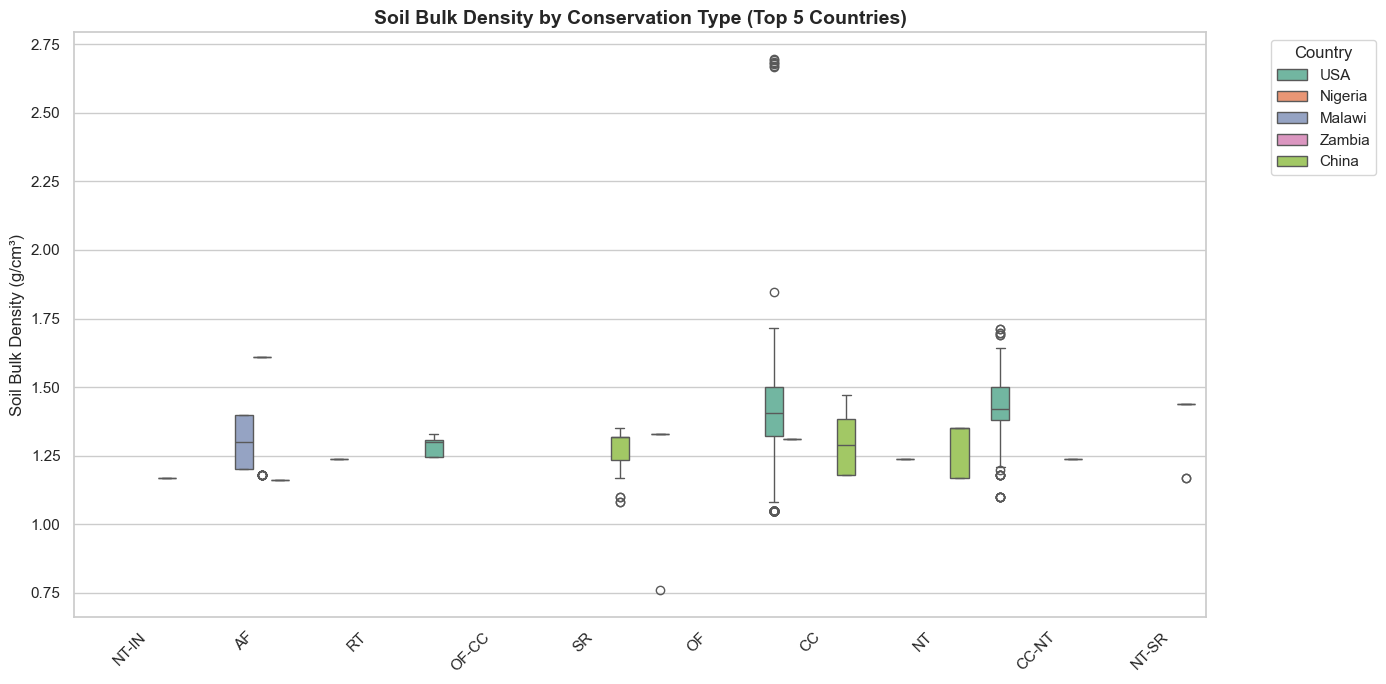

In [53]:
# Redefine the filtered_df based on top 5 countries again since it's missing
top_countries = (
    full_selection_df['Country']
    .value_counts()
    .nlargest(5)
    .index
)

filtered_df = full_selection_df[full_selection_df['Country'].isin(top_countries)]

# Identify which Conservation_Types have data
valid_types = (
    filtered_df.groupby("Conservation_Type")["SoilBD"]
    .apply(lambda x: x.notna().sum())
    .loc[lambda x: x > 0]
    .index
)

# Sort remaining types by median SoilBD
sorted_valid_order = (
    filtered_df[filtered_df["Conservation_Type"].isin(valid_types)]
    .groupby("Conservation_Type")["SoilBD"]
    .median()
    .sort_values()
    .index
)

# Plot cleaned version
plt.figure(figsize=(14, 7))
sns.set_theme(style="whitegrid")
sns.boxplot(
    data=filtered_df[filtered_df["Conservation_Type"].isin(valid_types)],
    x="Conservation_Type",
    y="SoilBD",
    hue="Country",
    order=sorted_valid_order,
    palette="Set2"
)

# Formatting
plt.title("Soil Bulk Density by Conservation Type (Top 5 Countries)", fontsize=14, weight='bold')
plt.ylabel("Soil Bulk Density (g/cm³)")
plt.xlabel("")
plt.xticks(rotation=45)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


### Mean and SD barplot

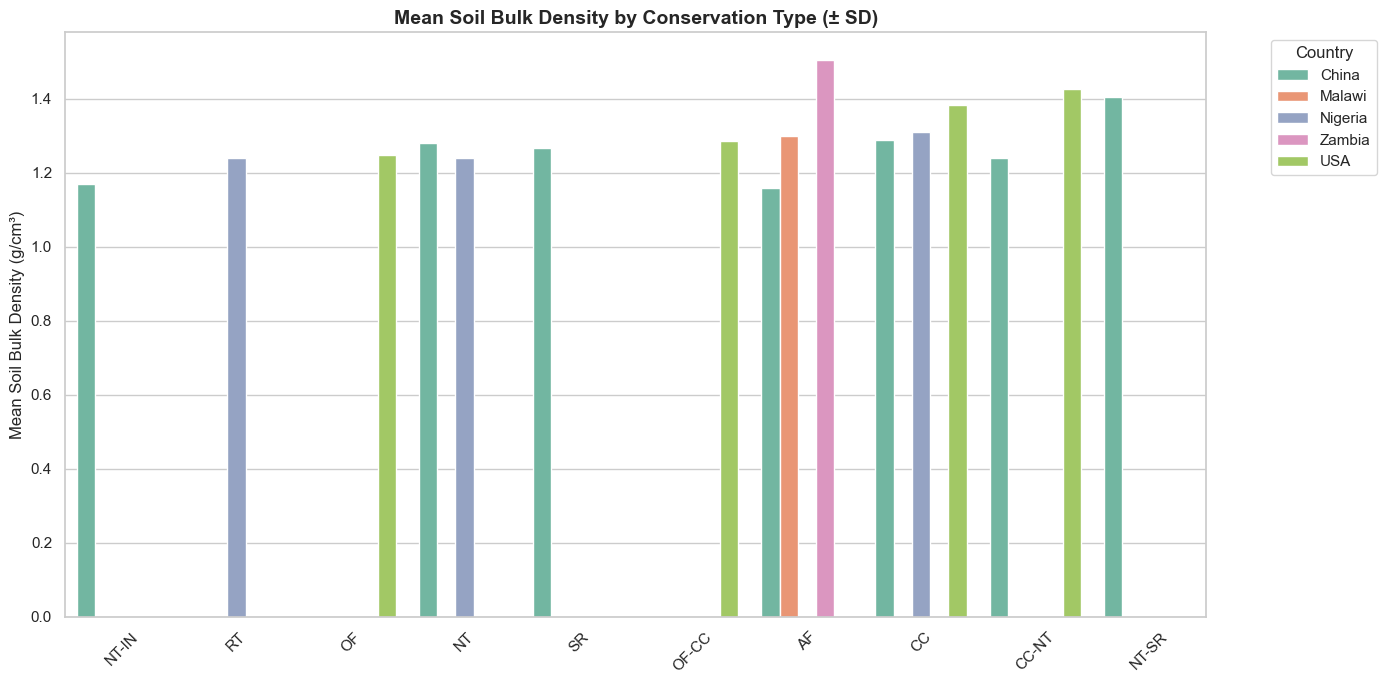

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter to top 5 countries with most data
top_countries = (
    full_selection_df['Country']
    .value_counts()
    .nlargest(5)
    .index
)

filtered_df = full_selection_df[full_selection_df['Country'].isin(top_countries)]

# Remove unused Conservation Types
valid_types = (
    filtered_df.groupby("Conservation_Type")["SoilBD"]
    .apply(lambda x: x.notna().sum())
    .loc[lambda x: x > 0]
    .index
)

filtered_df = filtered_df[filtered_df["Conservation_Type"].isin(valid_types)]

# Compute mean and standard deviation
bar_data = (
    filtered_df.groupby(['Conservation_Type', 'Country'])['SoilBD']
    .agg(['mean', 'std'])
    .reset_index()
)

# Sort conservation types by average mean SoilBD
mean_order = (
    bar_data.groupby("Conservation_Type")["mean"]
    .mean()
    .sort_values()
    .index
)

# Plot using updated seaborn API
plt.figure(figsize=(14, 7))
sns.set_theme(style="whitegrid")
sns.barplot(
    data=bar_data,
    x="Conservation_Type",
    y="mean",
    hue="Country",
    order=mean_order,
    palette="Set2",
    errorbar=("sd"),
    err_kws={'linewidth': 1.5},
    capsize=0.1
)

# Format plot
plt.title("Mean Soil Bulk Density by Conservation Type (± SD)", fontsize=14, weight='bold')
plt.ylabel("Mean Soil Bulk Density (g/cm³)")
plt.xlabel("")
plt.xticks(rotation=45)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


### Correlation Heatmap

Text(0.5, 1.0, 'Correlation Between Soil Health Indicators')

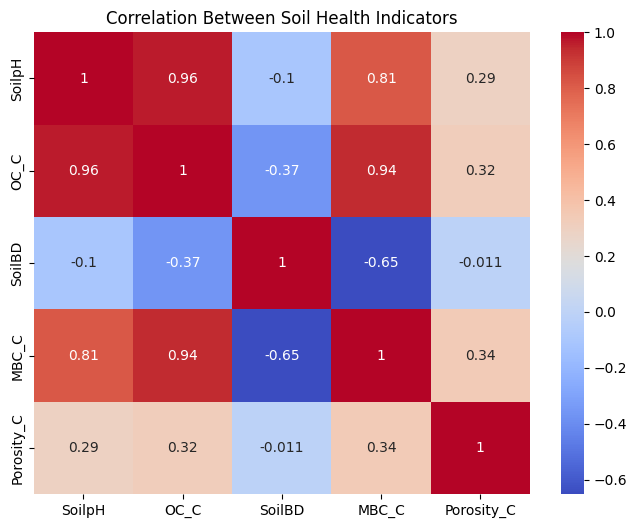

In [19]:
corr_data = full_selection_df[soil_indicators].dropna()
fig3, ax3 = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_data.corr(), annot=True, cmap='coolwarm', ax=ax3)
ax3.set_title('Correlation Between Soil Health Indicators')

## Inferential statistics

### Two way ANOVA

In [86]:
# Define list of numeric soil indicators
numeric_indicators = [
    col for col in soil_health_columns
    if pd.api.types.is_numeric_dtype(df_filtered[col]) and df_filtered[col].notna().sum() >= 30
]

# Run Two-Way ANOVA for each indicator
anova_results = []

for indicator in numeric_indicators:
    temp_df = df_filtered[['Conservation_Type', 'Country', indicator]].dropna()
    if temp_df['Conservation_Type'].nunique() < 2 or temp_df['Country'].nunique() < 2:
        continue
    try:
        formula = f'{indicator} ~ C(Conservation_Type) + C(Country) + C(Conservation_Type):C(Country)'
        model = ols(formula, data=temp_df).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        anova_results.append({
            'Soil_Indicator': indicator,
            'p_Conservation': anova_table.loc['C(Conservation_Type)', 'PR(>F)'],
            'p_Country': anova_table.loc['C(Country)', 'PR(>F)'],
            'p_Interaction': anova_table.loc['C(Conservation_Type):C(Country)', 'PR(>F)']
        })
    except Exception as e:
        print(f"Skipped {indicator}: {e}")

# Format the ANOVA summary
anova_df = pd.DataFrame(anova_results).sort_values(by='p_Conservation')
anova_df = anova_df.round(4)
significant_indicators = anova_df[anova_df['p_Conservation'] < 0.05]['Soil_Indicator'].tolist()

# Tukey HSD tests for significant indicators
tukey_all = []

for indicator in significant_indicators:
    temp_df = df_filtered[['Conservation_Type', indicator]].dropna()
    try:
        tukey = pairwise_tukeyhsd(endog=temp_df[indicator], groups=temp_df['Conservation_Type'], alpha=0.05)
        tukey_df = pd.DataFrame(tukey.summary().data[1:], columns=tukey.summary().data[0])
        tukey_df = tukey_df[tukey_df['reject'] == True]
        tukey_df['Indicator'] = indicator
        tukey_all.append(tukey_df)
    except Exception as e:
        print(f"Tukey failed for {indicator}: {e}")

# Combine Tukey results into final table
if tukey_all:
    tukey_results_df = pd.concat(tukey_all, ignore_index=True)
    tukey_results_df['meandiff'] = tukey_results_df['meandiff'].astype(float).round(3)
    tukey_results_df['p-adj'] = tukey_results_df['p-adj'].astype(float).round(4)
    display(tukey_results_df[['Indicator', 'group1', 'group2', 'meandiff', 'p-adj', 'reject']])
else:
    print("No significant Tukey comparisons found.")


Skipped OC_C_SD%: invalid syntax (<unknown>, line 1)
Skipped OC_T_SD%: invalid syntax (<unknown>, line 1)


,Indicator,group1,group2,meandiff,p-adj,reject
0,Enzyme_T,CC,OF,176.097,0.0000,True
1,Enzyme_T,OF,OF-CC,-131.832,0.0089,True
2,CO2BTest_T,CC,OF-CC,53.778,0.0000,True
3,CO2BTest_T,CC-NT,OF-CC,60.534,0.0000,True
4,CO2BTest_T,OF,OF-CC,44.626,0.0000,True
...,...,...,...,...,...,...
115,EC_C,OF,OF-CC,-139.256,0.0001,True
116,Weed_C,CC,CC-NT,-2121.052,0.0036,True
117,Weed_C,CC,OF,-2741.863,0.0176,True
118,P_C_SD,AF,CC,-39.108,0.0014,True


### Boxplots for OC_C, MBC_C, and SoilpH

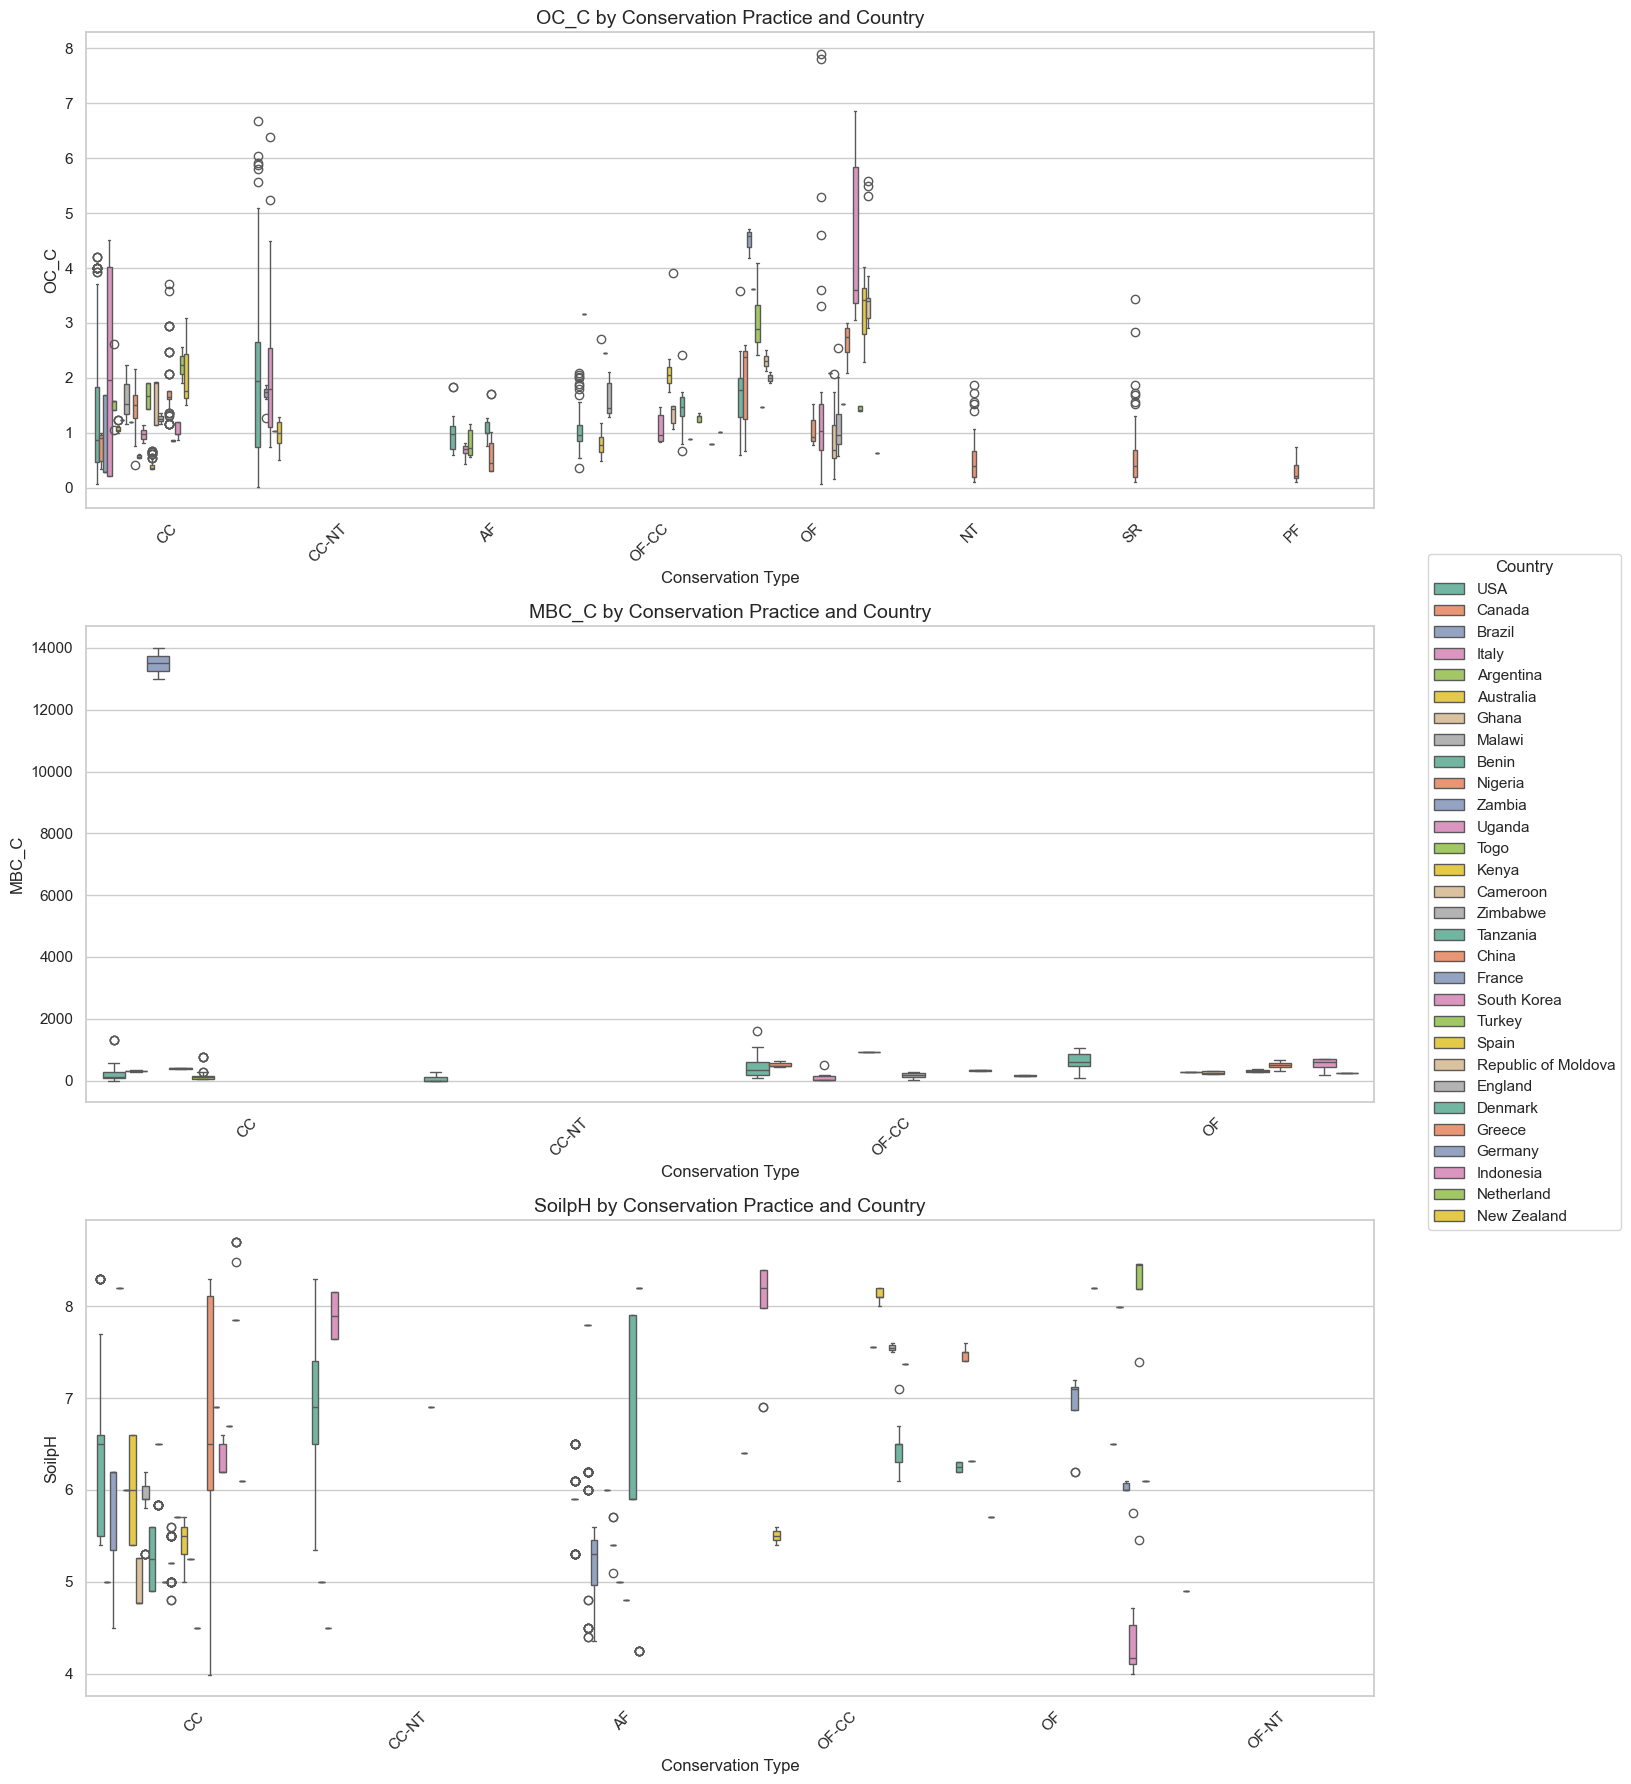

In [100]:
sns.set(style="whitegrid")

indicators = ['OC_C', 'MBC_C', 'SoilpH']
top_n = 8  # most frequent conservation types

fig, axes = plt.subplots(len(indicators), 1, figsize=(14, 18), sharex=False)

for i, indicator in enumerate(indicators):
    temp_df = df_filtered[['Conservation_Type', 'Country', indicator]].dropna()
    top_types = temp_df['Conservation_Type'].value_counts().head(top_n).index
    temp_df = temp_df[temp_df['Conservation_Type'].isin(top_types)]

    sns.boxplot(
        data=temp_df,
        x='Conservation_Type',
        y=indicator,
        hue='Country',
        palette='Set2',
        ax=axes[i],
        width=0.9
    )

    axes[i].set_title(f'{indicator} by Conservation Practice and Country', fontsize=14)
    axes[i].set_xlabel('Conservation Type', fontsize=12)
    axes[i].set_ylabel(indicator, fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend().remove()

# Shared legend outside plot
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, title="Country", bbox_to_anchor=(1.02, 0.5), loc='center left')
plt.tight_layout()
plt.show()


### Same, but violin plots

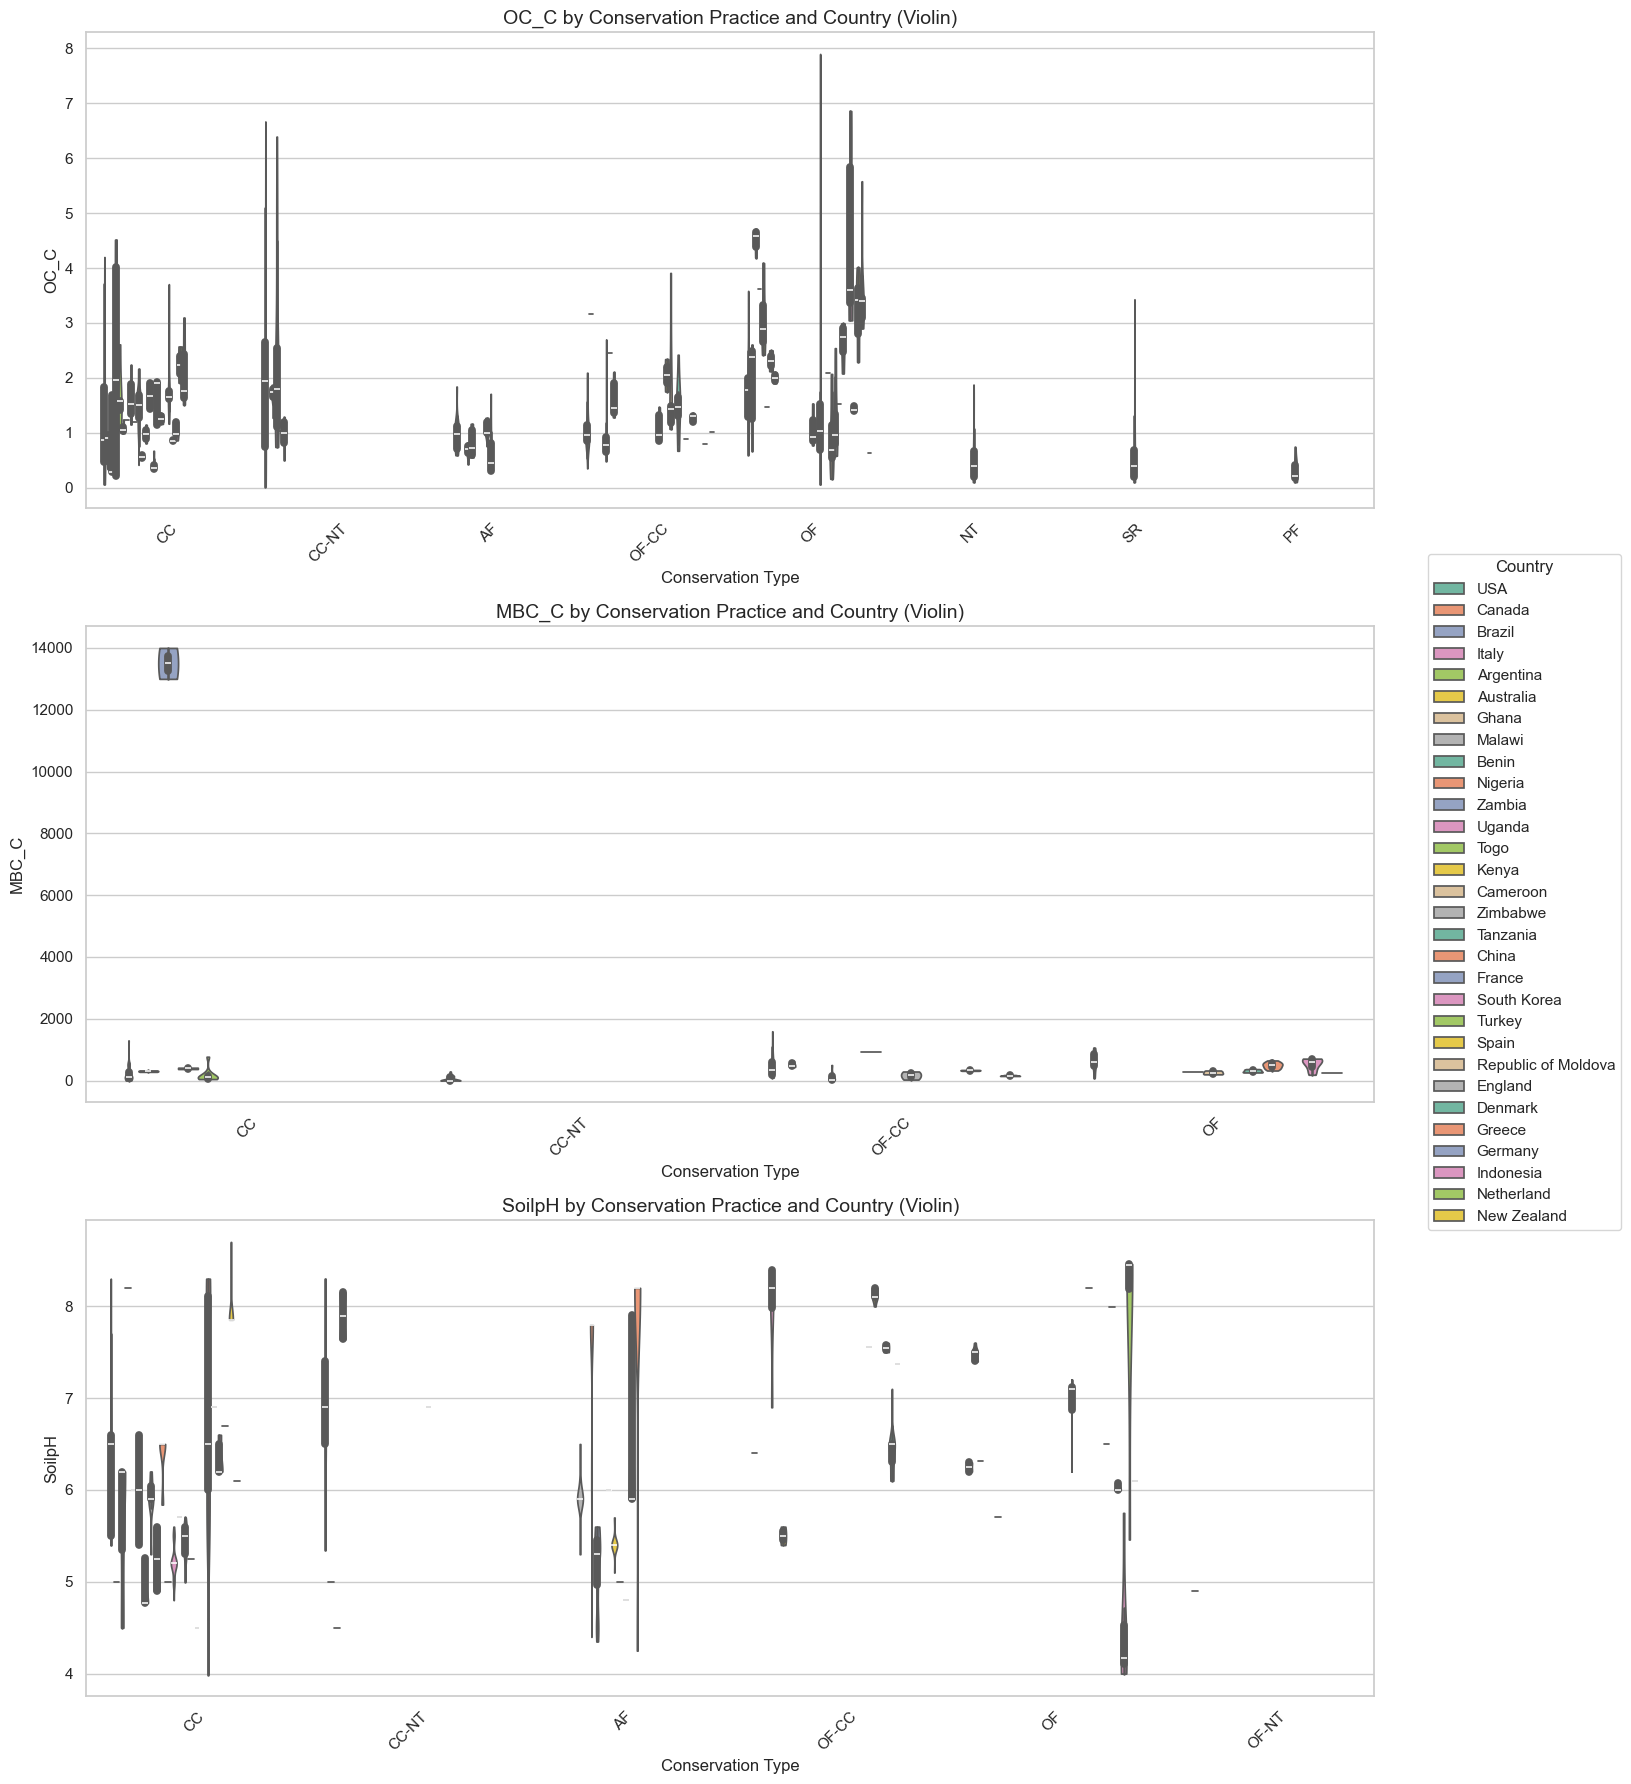

In [97]:
fig, axes = plt.subplots(len(indicators), 1, figsize=(14, 18), sharex=False)

for i, indicator in enumerate(indicators):
    temp_df = df_filtered[['Conservation_Type', 'Country', indicator]].dropna()
    top_types = temp_df['Conservation_Type'].value_counts().head(top_n).index
    temp_df = temp_df[temp_df['Conservation_Type'].isin(top_types)]

    sns.violinplot(
        data=temp_df,
        x='Conservation_Type',
        y=indicator,
        hue='Country',
        palette='Set2',
        ax=axes[i],
        cut=0,
        split=False
    )

    axes[i].set_title(f'{indicator} by Conservation Practice and Country (Violin)', fontsize=14)
    axes[i].set_xlabel('Conservation Type', fontsize=12)
    axes[i].set_ylabel(indicator, fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend().remove()

# Shared legend
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, title="Country", bbox_to_anchor=(1.02, 0.5), loc='center left')
plt.tight_layout()
plt.show()


In [90]:
# Make it pretty
# Create a clean summary table
summary_table = tukey_results_df[['Indicator', 'group1', 'group2', 'meandiff', 'p-adj', 'reject']].copy()
summary_table.columns = ['Indicator', 'Group 1', 'Group 2', 'Mean Diff', 'Adjusted p', 'Significant']
summary_table['Significant'] = summary_table['Significant'].map({True: '✅', False: '❌'})
summary_table = summary_table.sort_values(by=['Indicator', 'Adjusted p'])

# Display top 10
summary_table.tail(10)


,Indicator,Group 1,Group 2,Mean Diff,Adjusted p,Significant
101,AWHC_C,CC,OF,-186.506,0.0000,✅
100,AWHC_C,CC,CC-NT,-185.715,0.0001,✅
102,AWHC_C,CC,OF-CC,-196.064,0.0001,✅
99,AWHC_C,AF,CC,172.466,0.0009,✅
85,AWHC_T,CC,OF,-148.532,0.0000,✅
84,AWHC_T,CC,CC-NT,-146.525,0.0001,✅
86,AWHC_T,CC,OF-CC,-157.482,0.0001,✅
83,AWHC_T,AF,CC,122.062,0.0032,✅
5,CO2BTest_C,CC,OF-CC,56.748,0.0000,✅
6,CO2BTest_C,CC-NT,OF-CC,62.785,0.0000,✅
